In [17]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator
%matplotlib inline

In [22]:
#ds = Dataset('../ROMS_withWRF_0p25degCrse_data_inst.nc')
#ds = Dataset('../ROMS_withWRF_0p25degCrse_data_crseAtm_inst_2p5deg.nc')
ds2 = Dataset('../ROMS_withWRF_data_inst.nc')


ds = Dataset('../TempData_0p25degCrse_data_crseAtm_inst_2p5deg.nc')
ds2 = Dataset('../../../Downloaded/hseoRun/ROMS_data/surf_data_temp_ROMS_2016.nc')

ds.variables.keys(), ds2.variables.keys()

(dict_keys(['sst', 'crs_sst']),
 dict_keys(['lat_rho', 'lon_rho', 'ocean_time', 'temp_sur']))

In [23]:
n = 2000
varname = 'uo'
varname = 'ua'
varname = 'sst'
crs_varname = 'crs_sst'
varname2 = 'temp_sur'

uo = np.array(ds.variables[varname][n,:,:])
crs_uo = np.array(ds.variables[crs_varname][n,:,:])
uo_orig = np.array(ds2.variables[varname2][n,:,:])

#uo_orig[abs(uo_orig) > 1e10] = float('nan')

data = uo_orig.copy()
mask = np.where(~np.isnan(data))
interp = NearestNDInterpolator(np.transpose(mask), data[mask])
uo_orig = interp(*np.indices(data.shape))

ds.close()
ds2.close()

In [25]:
np.max(uo_orig)

1e+37

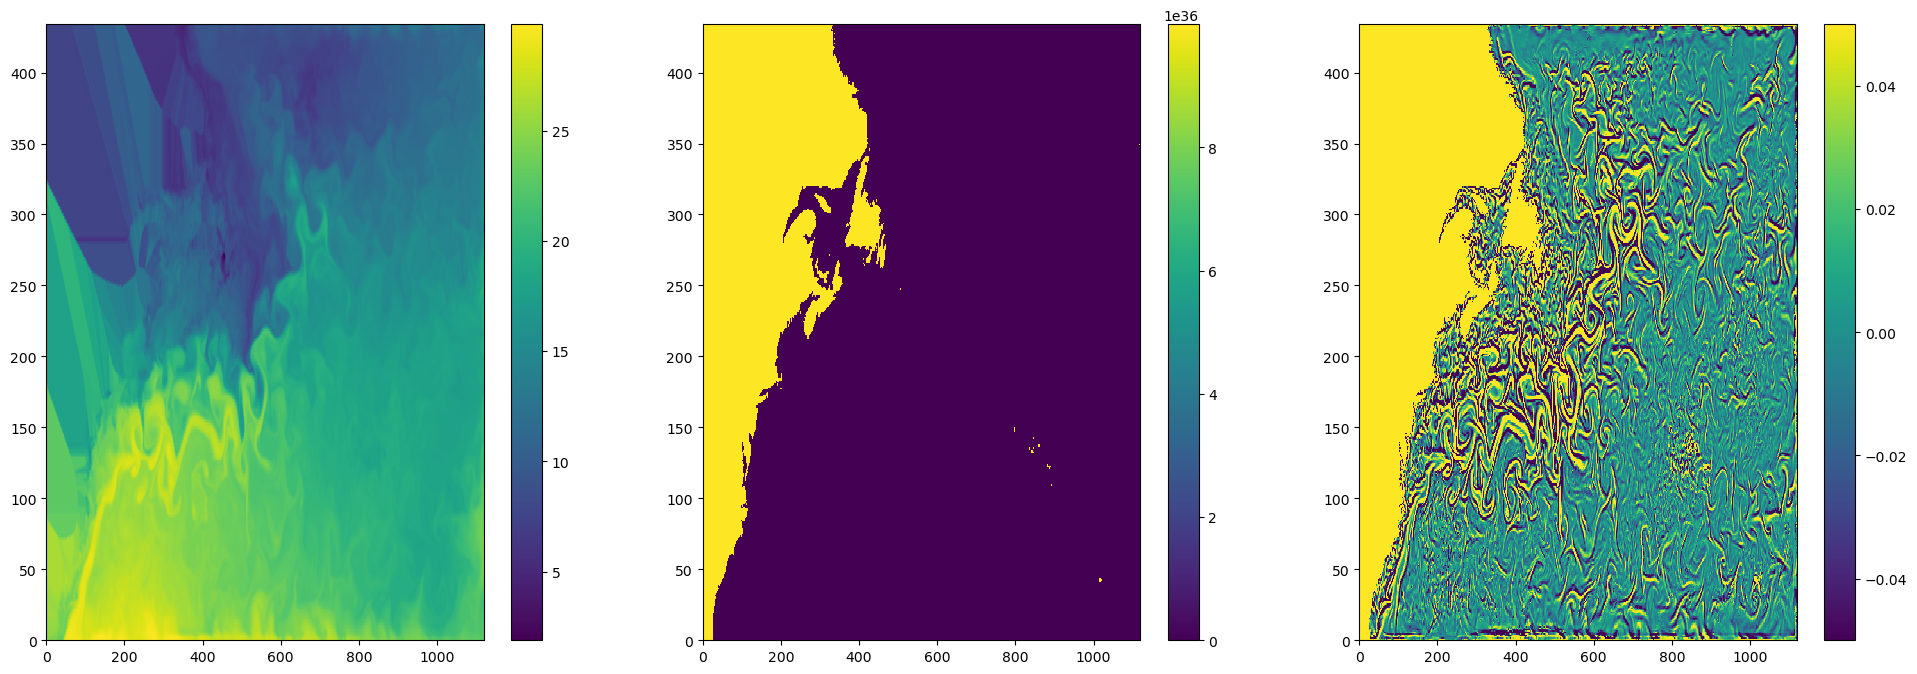

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 0.05

ax = axes[0]
m = ax.pcolormesh(uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo_orig)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo_orig- uo, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)


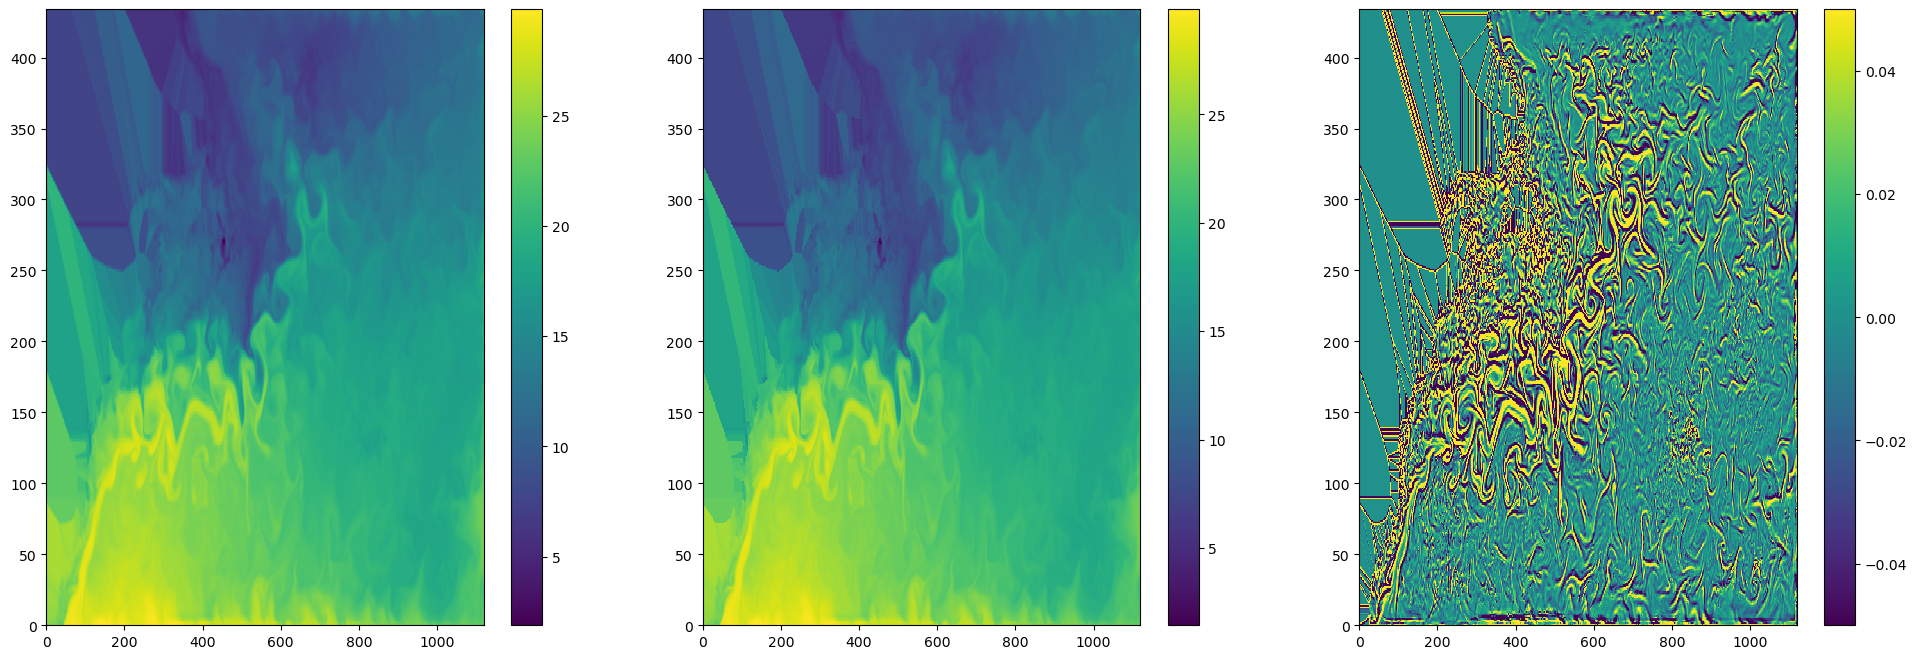

In [19]:
### second

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 0.05

ax = axes[0]
m = ax.pcolormesh(uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo_orig)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo_orig- uo, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)


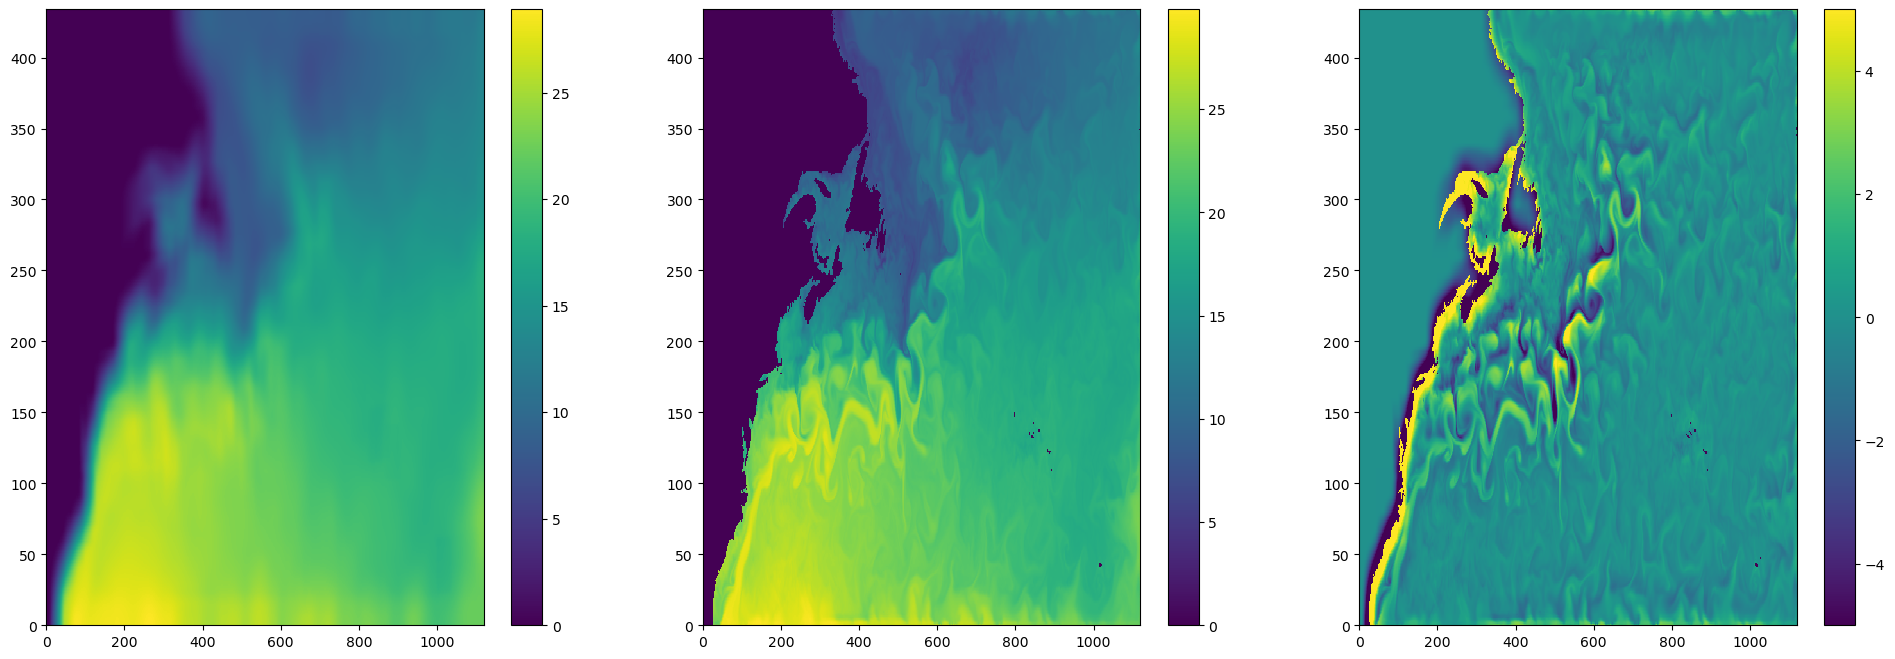

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 5

ax = axes[0]
m = ax.pcolormesh(crs_uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo_orig)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo_orig- crs_uo, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)


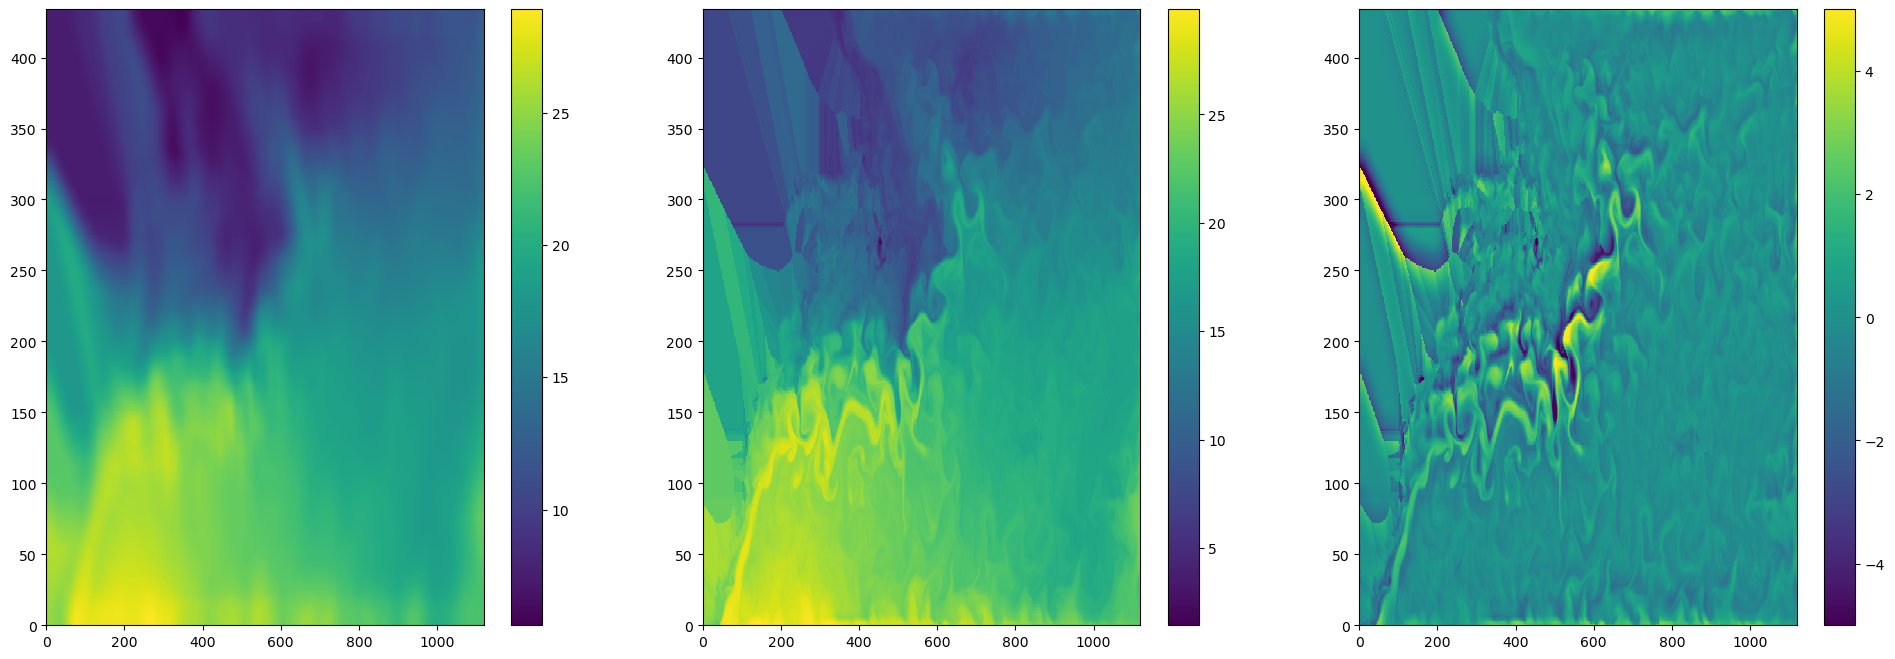

In [20]:
#### second

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 5

ax = axes[0]
m = ax.pcolormesh(crs_uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo_orig)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo_orig- crs_uo, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)


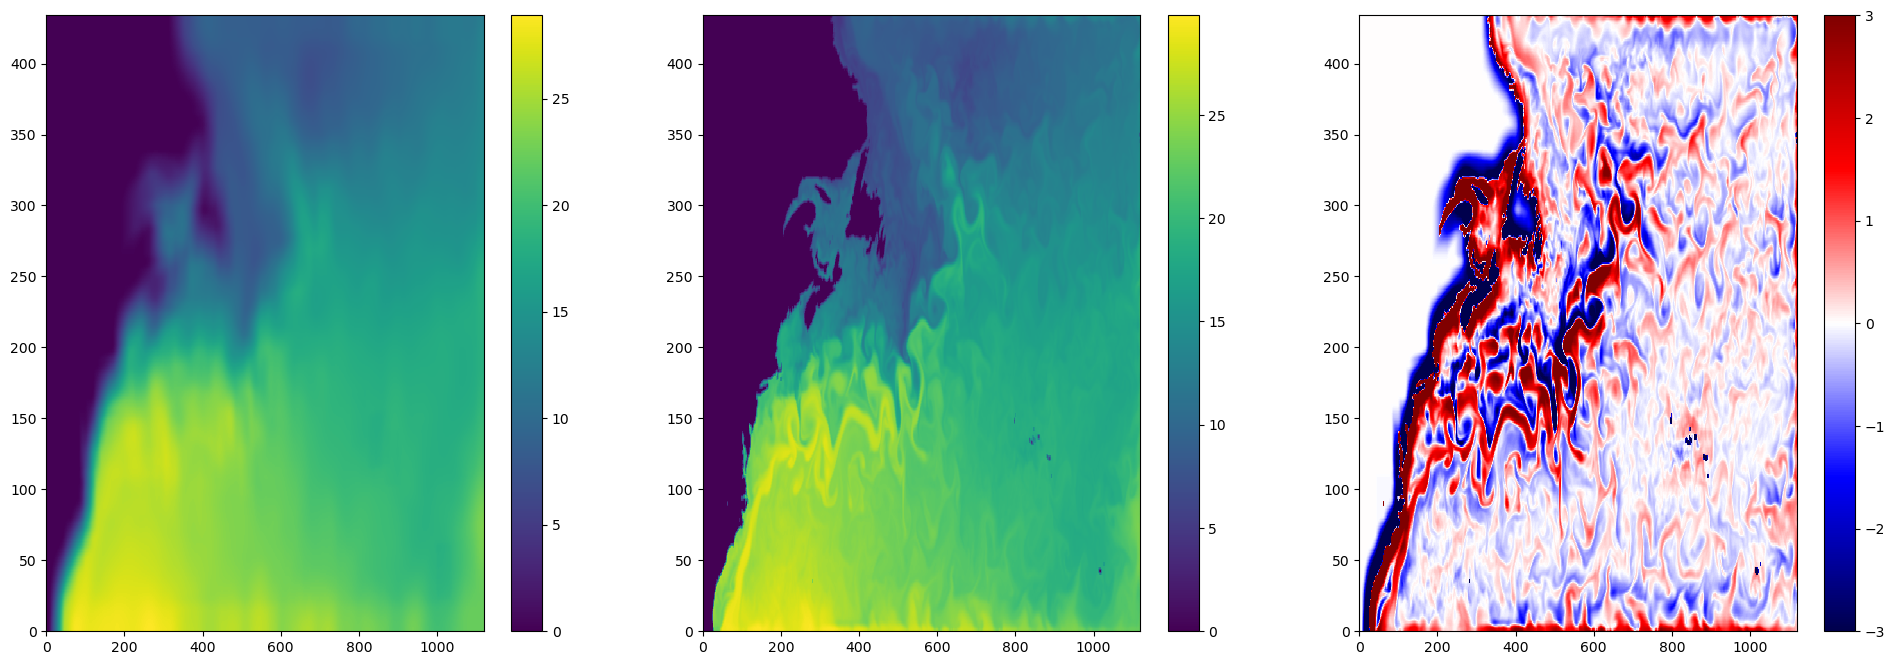

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 3

ax = axes[0]
m = ax.pcolormesh(crs_uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo- crs_uo, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)


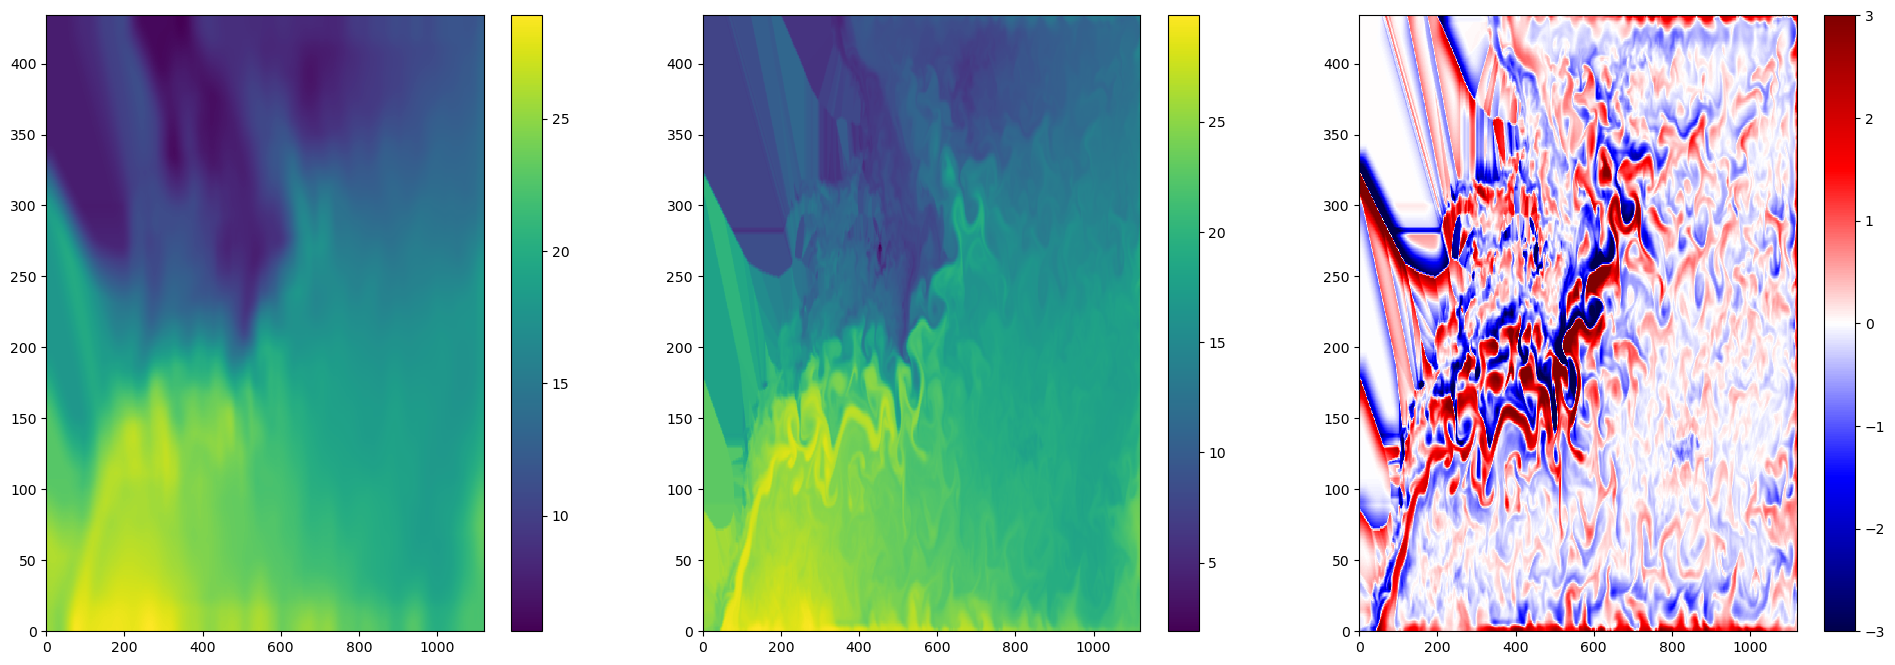

In [21]:
### second

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8))

v = 3

ax = axes[0]
m = ax.pcolormesh(crs_uo)#,vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[1]
m = ax.pcolormesh(uo)#, vmin=-v, vmax=v)
plt.colorbar(m, ax=ax)

ax = axes[2]
m = ax.pcolormesh(uo- crs_uo, vmin=-v, vmax=v, cmap='seismic')
plt.colorbar(m, ax=ax)
